<h1> Kaplan-Meier Survival Curves 

<h2> Convert Excel file to .CSV file

In [1]:
# install openpyxl via pip if you dont already have, so that the .xlsx file can be converted to .csv file
#import pandas 
import pandas as pd

# define the correct file paths
excel_path = "/Users/alinaelahie/Desktop/Machine-Learning-and-AI--Survival-Analysis/Data/RADCURE_Clinical_v04_20241219.xlsx"
csv_path = "/Users/alinaelahie/Desktop/Machine-Learning-and-AI--Survival-Analysis/Data/RADCURE_Clinical_v04_20241219.csv"

# read the Excel file
df = pd.read_excel(excel_path, engine="openpyxl")

# save it as a CSV
df.to_csv(csv_path, index=False)

# load the CSV to check if it exists
data = pd.read_csv(csv_path)
print(data.head())  # display first few rows



     patient_id   Age     Sex ECOG PS Smoking PY Smoking Status     Ds Site  \
0  RADCURE-0005  62.6  Female  ECOG 0         50      Ex-smoker  Oropharynx   
1  RADCURE-0006  87.3    Male  ECOG 2         25      Ex-smoker      Larynx   
2  RADCURE-0007  49.9    Male  ECOG 1         15      Ex-smoker  Oropharynx   
3  RADCURE-0009  72.3    Male  ECOG 1         30      Ex-smoker     Unknown   
4  RADCURE-0010  59.7  Female  ECOG 0          0     Non-smoker  Oropharynx   

           Subsite    T    N  ... Local Date Local Regional Date Regional  \
0        post wall  T4b  N2c  ...   NaN        NaN      NaN           NaN   
1          Glottis  T1b   N0  ...   NaN        NaN      NaN           NaN   
2           Tonsil   T3  N2b  ...   NaN        NaN      NaN           NaN   
3              NaN   T0  N2c  ...   NaN        NaN      NaN           NaN   
4  Tonsillar Fossa  T4b   N0  ...   NaN        NaN      NaN           NaN   

  Distant Date Distant            2nd Ca  Date 2nd Ca  RADCURE

In [ ]:
%pip install lifelines
# convert 'Length FU' to numeric time
data['time'] = pd.to_numeric(data['Length FU'], errors='coerce')

# convert Status to event indicator (1 = Dead, 0 = Alive)
data['event'] = data['Status'].apply(lambda x: 1 if x == 'Dead' else 0)

# drop any rows where 'time' or 'event' is missing
data = data.dropna(subset=['time', 'event'])

# define treatment groups again
group1 = data[data['Tx Modality'] == 'RT alone']
group2 = data[data['Tx Modality'] == 'ChemoRT']

# check if groups are properly defined
print("Group1 size:", len(group1))
print("Group2 size:", len(group2))






[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Group1 size: 1858
Group2 size: 1412


<h3> KM Curve for TX Modality: Radiation and Chemotherapy 

In [ ]:
# import libraries
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test

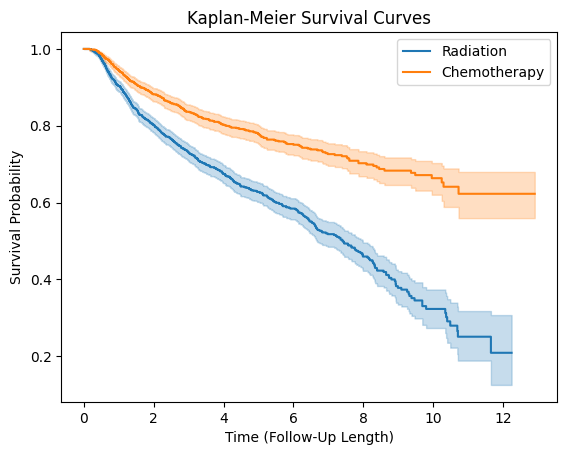

   test_statistic             p   -log2(p)
0      115.740018  5.418739e-27  87.254101


In [18]:
#remove NaN values
group1 = group1.dropna(subset=['time', 'event'])
group2 = group2.dropna(subset=['time', 'event'])

# rename relevant columns
data['time'] = data['Length FU']  # Survival time
data['event'] = data['Status'].apply(lambda x: 1 if x == 'Dead' else 0)  # 1 if dead, 0 otherwise

# define treatment groups
group1 = data[data['Tx Modality'] == 'RT alone']
group2 = data[data['Tx Modality'] == 'ChemoRT']

# kaplan-Meier estimation
kmf = KaplanMeierFitter()

# plot survival function for Radiation
kmf.fit(group1['time'], event_observed=group1['event'], label='Radiation')
kmf.plot_survival_function()

# plot survival function for Chemotherapy
kmf.fit(group2['time'], event_observed=group2['event'], label='Chemotherapy')
kmf.plot_survival_function()

plt.xlabel("Time (Follow-Up Length)")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves")
plt.legend()
plt.show()

# log-rank test to compare survival curves
results = logrank_test(group1['time'], group2['time'], event_observed_A=group1['event'], event_observed_B=group2['event'])
print(results.summary)



<h3> KM Curve for Age: Below 60 and above or equal to 60

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

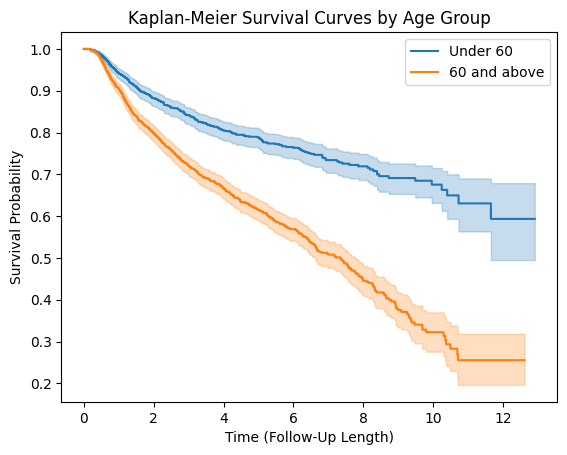

   test_statistic             p    -log2(p)
0      135.072795  3.182830e-31  101.309461


In [ ]:

# remove NaN values for relevant columns
data = data.dropna(subset=['time', 'event', 'Age'])

# create age categories (below 60 and above or equal to 60)
data['Age Group'] = data['Age'].apply(lambda x: 'Under 60' if x < 60 else '60 and above')

# rename relevant columns
data['time'] = data['Length FU']  # Survival time
data['event'] = data['Status'].apply(lambda x: 1 if x == 'Dead' else 0)  # 1 if dead, 0 otherwise

# define age groups (Under 60 vs. 60 and above)
group1 = data[data['Age Group'] == 'Under 60']
group2 = data[data['Age Group'] == '60 and above']

# Kaplan-Meier estimation
kmf = KaplanMeierFitter()

# plot survival function for patients under 60
kmf.fit(group1['time'], event_observed=group1['event'], label='Under 60')
kmf.plot_survival_function()

# plot survival function for patients 60 and above
kmf.fit(group2['time'], event_observed=group2['event'], label='60 and above')
kmf.plot_survival_function()

# customize plot
plt.xlabel("Time (Follow-Up Length)")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by Age Group")
plt.legend()
plt.show()

# log-rank test to compare survival curves between age groups
results = logrank_test(group1['time'], group2['time'], event_observed_A=group1['event'], event_observed_B=group2['event'])
print(results.summary)


<h1>  Cox Proportional Hazards Regression

<lifelines.CoxPHFitter: fitted with 3346 total observations, 2288 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 3346
number of events observed = 1058
   partial log-likelihood = -7764.29
         time fit was run = 2025-03-14 16:58:40 UTC

---
             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                    
Age          0.04      1.04      0.00            0.03            0.04                1.03                1.04
Tx Modality  0.18      1.19      0.02            0.14            0.21                1.15                1.24
Stage        0.12      1.12      0.01            0.10            0.14                1.10                1.15

             cmp to     z      p  -log2(p)
covariate                                 
Age            0.00 11.81 <0.005    104.55
Tx Modality    0.00  8.92 <0.005     60.96
Stage          0.00 11.90 <0.005    106.01
---
Concordance = 0.68
Partial AIC = 15534.59
log-likelihood ratio test = 413.79 on 3 df
-log2(p) of ll-ratio test = 294.46

<Axes: xlabel='log(HR) (95% CI)'>

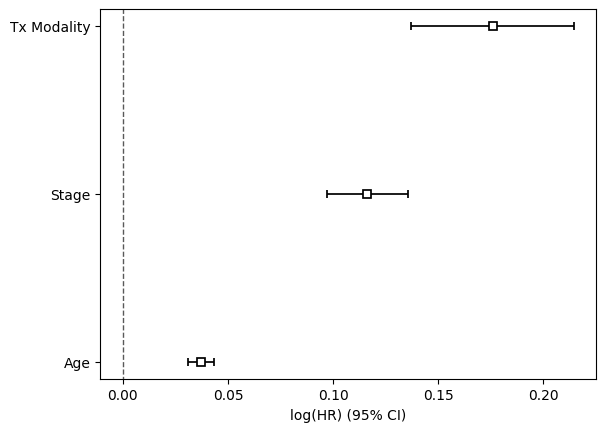

In [ ]:
from sklearn.preprocessing import LabelEncoder

# label encode the categorical variables
label_encoder_tx = LabelEncoder()
label_encoder_stage = LabelEncoder()

data['Tx Modality'] = label_encoder_tx.fit_transform(data['Tx Modality'])
data['Stage'] = label_encoder_stage.fit_transform(data['Stage'])

# fit the Cox model
cph = CoxPHFitter()
cph.fit(data[['Age', 'Tx Modality', 'Stage', 'time', 'event']], duration_col='time', event_col='event')

#print table 
cph.print_summary()

#plot hazard ratio of each predictor for visual 
cph.plot()


<h1> Random Survival Forests (RSF)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance

# encode categorical variables
label_encoder = LabelEncoder()

# check if Tx Modality and Stage need encoding
data['Tx Modality'] = label_encoder.fit_transform(data['Tx Modality'])
data['Stage'] = label_encoder.fit_transform(data['Stage'])

# convert y into structured array format
y_structured = np.array(
    [(event, time) for event, time in zip(data['event'], data['time'])], 
    dtype=[('event', '?'), ('time', '<f8')]
)

# define predictors
X = data[['Age', 'Tx Modality', 'Stage']]  # ensure these are numeric

# fit Random Survival Forest
rsf = RandomSurvivalForest(n_estimators=100)
rsf.fit(X, y_structured)

# calculate the C-index
y_pred = rsf.predict(X)
c_index = concordance_index_censored(y_structured['event'], y_structured['time'], y_pred)
print("C-Index:", c_index)

# feature importances using permutation importance
perm_importance = permutation_importance(rsf, X, y_structured, n_repeats=10, random_state=42)
print("Feature Importances:", perm_importance.importances_mean)


C-Index: (np.float64(0.8105310411702231), np.int64(1894453), np.int64(442485), np.int64(941), np.int64(754))
Feature Importances: [0.19058769 0.10558008 0.18957115]


<h3> Compare the model’s concordance index (C-index) with that of Cox regression

In [ ]:
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.utils import shuffle

# convert y into structured array format (event, time)
y_structured = np.array(
    [(event, time) for event, time in zip(data['event'], data['time'])],
    dtype=[('event', '?'), ('time', '<f8')]
)

# define predictors
X = data[['Age', 'Tx Modality', 'Stage']]  # Ensure categorical variables are encoded

# fit Random Survival Forest
rsf = RandomSurvivalForest(n_estimators=100)
rsf.fit(X, y_structured)

# calculate the concordance index (C-index)
y_pred = rsf.predict(X)
c_index_rsf_tuple = concordance_index_censored(y_structured['event'], y_structured['time'], y_pred)
c_index_rsf = c_index_rsf_tuple[0]  # Extract the actual C-index value
print("C-Index (RSF):", c_index_rsf)

# calculate feature importance using permutation importance
def permutation_importance(model, X, y, c_index_func, n_iterations=10):
    baseline_c_index_tuple = c_index_func(y['event'], y['time'], model.predict(X))
    baseline_c_index = baseline_c_index_tuple[0]  # Extract the actual C-index value
    importances = np.zeros(X.shape[1])
    
    for i in range(X.shape[1]):
        X_shuffled = X.copy()
        X_shuffled.iloc[:, i] = shuffle(X_shuffled.iloc[:, i])
        
        # Calculate the C-index after permuting the feature
        permuted_c_index_tuple = c_index_func(y['event'], y['time'], model.predict(X_shuffled))
        permuted_c_index = permuted_c_index_tuple[0]  # Extract the actual C-index value
        importances[i] = baseline_c_index - permuted_c_index
    
    return importances

# calculate the importance of each feature
importances = permutation_importance(rsf, X, y_structured, concordance_index_censored)
print("Feature Importances (Permutation):", importances)


C-Index (RSF): 0.8099724151677653
Feature Importances (Permutation): [0.19802971 0.10689732 0.18491676]


<h3> Compare C-Index between RSF and Cox regression:

In [ ]:
# ensure that the event column is boolean (True for event, False for censored)
data['event'] = data['event'].astype(bool)

# fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data[['Age', 'Tx Modality', 'Stage', 'time', 'event']], duration_col='time', event_col='event')

# predict survival function using the Cox model
cph_preds = cph.predict_partial_hazard(data[['Age', 'Tx Modality', 'Stage']])

# calculate the C-Index for the Cox model
c_index_cox = concordance_index_censored(data['event'], data['time'], cph_preds)
print("C-Index (Cox):", c_index_cox[0])

# print the C-Indices 
print("C-Index (RSF):", c_index_rsf)


C-Index (Cox): 0.6770566398004345
C-Index (RSF): 0.8099724151677653
